# Método de Euler

**Objetivo general**
- Realizar el seguimiento de un conjunto de partículas dentro de un flujo usando el Método de Euler hacia adelante.

**Objetivos particulares**
- Entender en qué consiste el flujo de Poiseuille.
- Calcular la trayectoria de una partícula.
- Calcular la trayectoria de varias partículas.
- Expresar el problema en términos de un Problema de Valor Inicial.

## Contenido
- [1. Flujo en una tubería.](#1)
- [2. Cálculo de una sola trayectoria.](#2)
    - [2.1 Definición y graficación del flujo. ](#2-1)
    - [2.2 Definición de la posición inicial de la partícula y graficación. ](#2-2)
    - [2.3 Seguimiento de la partícula y graficación de la trayectoria. ](#2-3)
        - [Ejercicio 1. Implementación del Método de Euler en 2D.](#ej-1)
        - [Ejercicio 2. Implementación del Método de Euler para varios pasos de tiempo.](#ej-2)
- [3. Cálculo de varias trayectorias.](#3)
    - [3.1 Definición las posiciones iniciales. ](#3-1)
    - [3.2 Seguimiento de todas las partículas. ](#3-2)
        - [Ejercicio 3. Implementación del Método de Euler para varias partículas.](#ej-3)
        - [Ejercicio 4. Interactivo.](#ej-4)
- [4. Problemas de valor inicial.](#4)
- [5. Deducción de Método de Euler (OPCIONAL).](#5)

In [67]:
# Importamos las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np

import macti.visual as mvis
#from macti.evaluation import FileAnswer
#file_answer = FileAnswer('Metodo_Euler', 'teacher', 'local')

from macti.evaluation import Quizz
quizz = Quizz('1', 'Metodo_Euler', 'teacher', 'local')

<a name='1'></a>
## Flujo en una tubería.
De acuerdo con la <a href="https://es.wikipedia.org/wiki/Ley_de_Poiseuille#C%C3%A1lculo_de_la_f%C3%B3rmula">Ley de Poiseuille</a> la velocidad de un líquido incompresible y uniformemente viscoso (<a href="https://es.wikipedia.org/wiki/Fluido_newtoniano">fluido newtoniano</a>) a través de un tubo cilíndrico de sección circular constante se puede calcular mediante la siguiente fórmula

$$
u(r) =\left( \dfrac{\Delta p}{4 L \mu} \right)(R^2 - r^2) \tag{1}
$$

donde $\mu$ es la viscosidad dinámica del fluido, $\Delta p$ representa la diferencia de presión entre dos puntos a lo largo del eje del cilindro, $L$ y $R$ representan la longitud y el radio del cilindro respectivamente. La ecuación $(1)$ define a la velocidad $u$ como una función de $r$, y esta última es una variable que se mide desde desde el eje del cilindro en el intervalo $[0,R]$, véase la siguiente figura:

<a title="Af3 at the Spanish language Wikipedia, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Poiseuille.png"><img width="300" alt="Poiseuille" src="https://upload.wikimedia.org/wikipedia/commons/4/46/Poiseuille.png"></a>     

### Graficación de la velocidad del flujo.

Observamos que la fórmula $(1)$ representa una parábola.

* Primero definimos la fórmula en una función.

In [56]:
u = lambda r: ΔP*(R**2 - r**2)/(4*L*μ)  # Flujo de Poiseuille

* Definimos algunos datos para la fórmula.

In [57]:
ΔP = 0.298  # Diferencia de presiones
μ = 1.05e-3 # Viscosidad del flujo
L = 3.0     # Longitud del tubo
R = 0.5     # Radio del tubo
print('Diferencia de presiones: {} \nViscosidad: {} \nLongitud: {} \nRadio: {}'.format(ΔP,μ,L,R))

Diferencia de presiones: 0.298 
Viscosidad: 0.00105 
Longitud: 3.0 
Radio: 0.5


* Evaluamos y graficamos la fórmula.

**Nota**: En la figura de arriba observamos que la $r$ varía en la dirección $y$ de los ejes Cartesianos.

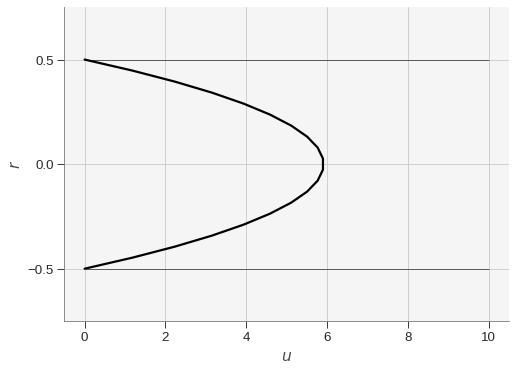

In [58]:
# Definición de r
r = np.linspace(-R,R,20)

vis = mvis.Plotter(1,1)

# Evaluación y graficación de u(r)
vis.plot(1, u(r), r)

# Configuración de la gráfica
plt.xlabel('$u$')
plt.ylabel('$r$')
plt.yticks([-R,0,R])
plt.ylim(-1.5*R,1.5*R)
plt.hlines([-R,R], xmin=0, xmax=10, lw=0.5)
plt.show()

### Velocidad del flujo en todo el tubo.

* Para dibujar la velocidad en todo el tubo definimos el siguiente conjunto de coordenadas:

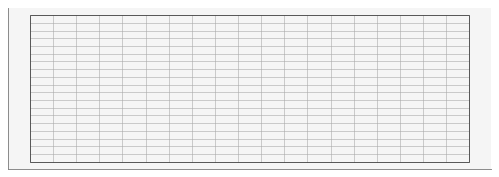

In [59]:
# Primero definimos las coordenadas en el eje x.
x = np.linspace(0, L, 20)

# Ahora definimos una malla en todo el tubo.
xg, yg = np.meshgrid(x, r, indexing='ij', sparse=False)

vis = mvis.Plotter(1,1, [dict(aspect = 'equal')])

# Graficamos la malla.
vis.plot_mesh2D(1, xg, yg)
vis.plot_frame(1, xg, yg, ticks=False)

plt.show()

* Definición de la velocidad en la malla.

Dado que el dominio es bidimensional, la velocidad estará definida de la siguiente manera $\vec{V}(x,r) = \big( u(x,r), v(x,r) \big)$ donde:

$$
\begin{eqnarray}
u(x, r) & = & \left( \dfrac{\Delta p}{4 L \mu} \right)(R^2 - r^2) \\
v(x, r) & = & 0
\end{eqnarray}
$$


La implementación de la velocidad es como sigue:

In [60]:
u = lambda x, r: ΔP*(R**2 - r**2)/(4*L*μ)  # Flujo de Poiseuille
v = lambda x, r: r*0                       # La velocidad en dirección vertical es cero.

En el código anterior hemos usado funciones `lambda` de Python, una introducción se puede ver [aquí](https://www.freecodecamp.org/news/python-lambda-function-explained/#:~:text=lambda%20is%20a%20keyword%20in,what%20you%20want%20to%20achieve). Observe que las funciones `lambda` definidas en la celda anterior, reciben los parámetros `x` y `r`, de esta manera se evalúan `u` y `v` sobre toda la malla.

La gráfica del flujo en todo el tubo es la siguiente:

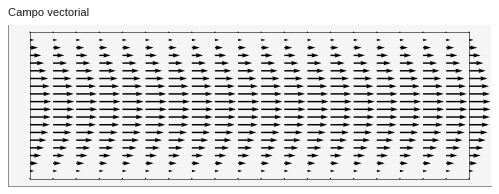

In [61]:
vis = mvis.Plotter(1,1, [dict(aspect = 'equal')])
vis.quiver(1, xg, yg, u(xg,yg), v(xg,yg), dict())
vis.plot_frame(1, xg, yg, ticks=False)
vis.axes(1).set_title('Campo vectorial', fontsize=10)
plt.show()

<a name='2'></a>
## Cálculo de una sola trayectoria.

Supongamos que soltamos una partícula en el punto $(x_i, y_i)$ dentro del cilindro del flujo de Poiseuille descrito arriba. **¿Hacía donde se moverá esa partícula?**

Hagamos el siguiente análisis:

1. Dada una partícula $p$ ubicada dentro del flujo, su velocidad está dada por el vector $(u_p, v_p)$.

2. La velocidad de la partícula en dirección $x$ se puede calcular con la fórmula simple $u_p = \dfrac{\delta x}{\delta t}$, donde $\delta x$ es la distancia que recorre la partícula en el tiempo $\delta t$.

3. De aquí sabemos que la distancia es $\delta x = \delta t * u_p$.

4. Si la partícula se encuentra inicialmente en $x_i$ y después de un tiempo $\delta t$ llega al punto $x_f$, entonces la distancia recorrida será $\delta x = x_f - x_i$. 

5. Por lo tanto, combinando las fórmulas de 3. y 4., es fácil ver que el punto $x_f$ se obtiene con la siguiente fórmula:

$$
x_f = x_i +  \delta t * u_p \tag{2}
$$

La ecuación $(2)$ representa el **Método de Euler** hacia adelante para aproximar la solución de una Ecuación Diferencial Ordinaria de primer orden.

Antes de revisar los detalles de este método veamos como podemos calcular las trayectorias de algunas partículas usando la fórmula $(2)$ y dibujarlas dentro del flujo.

Resolveremos el problema paso a paso. Primero para una partícula haremos lo siguiente:

1. Definición del flujo y graficación del flujo.
2. Definición de la posición inicial de la partícula y graficación.
3. Seguimiento de la partícula dentro del flujo y graficación de la trayectoria.

<a name='2-1'></a>
### Definición y graficación del flujo.

Este punto lo hicimos antes, aquí solo repetimos los pasos realizados

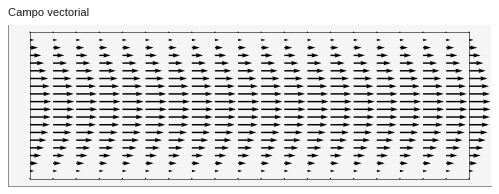

In [62]:
# Coordenadas Cartesianas
x = np.linspace(0,L,20)
r = np.linspace(-R,R,20)

# Generación de la malla
xg, yg = np.meshgrid(x, r, indexing='ij', sparse=False)

# Campo de velocidad
u = lambda x,r: ΔP*(R**2 - r**2)/(4*L*μ)  # Flujo de Poiseuille
v = lambda x,r: r*0                       # La velocidad en dirección vertical es cero.

# Graficación del campo de velocidades (u,v)
vis = mvis.Plotter(1,1, [dict(aspect = 'equal')])
vis.quiver(1, xg, yg, u(xg,yg), v(xg,yg), dict())
vis.plot_frame(1, xg, yg, ticks=False)
vis.axes(1).set_title('Campo vectorial', fontsize=10)
plt.show()

<a name='2-2'></a>
### Definición de la posición inicial de la partícula y graficación.

La posición inicial de la partícula debe estar dentro del dominio de estudio, es decir dentro de $[0,L] \times [-R, R]$.

In [63]:
# Posición inicial de la partícula
xi = 0.1 
yi = 0.0

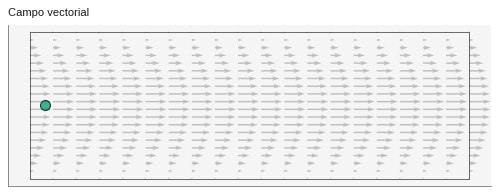

In [64]:
vis = mvis.Plotter(1,1, [dict(aspect = 'equal')])

# Graficación de la posición inicial de la partícula
vis.scatter(1, xi, yi, dict(fc='C3', ec='k', alpha=0.75, s=80, zorder=5))

# Graficación del flujo.
vis.quiver(1, xg, yg, u(xg,yg), v(xg,yg), dict(color='silver'))
vis.plot_frame(1, xg, yg, ticks=False)
vis.axes(1).set_title('Campo vectorial', fontsize=10)
plt.show()

<a name='2-3'></a>
### Seguimiento de la partícula y graficación de la trayectoria.

A partir de la fórmula $(2)$, que es el método de Euler hacia adelante, podemos calcular la siguiente posición de la partícula aplicando dicha fórmula a cada coordenada:

$$
\begin{eqnarray}
x_f & = & x_i + \delta t * u_p  \tag{3}\\
y_f & = & y_i + \delta t * v_p \\
\end{eqnarray}
$$

<a name='ej-1'></a>
#### **<font color="DodgerBlue">Ejercicio 1. Implementación del Método de Euler en 2D.</font>**

<font color="DarkBlue">Para la posición inicial $(x_i, y_i) = (0.1,0.0)$ y $t = 0.05$ calcule la posición final $(x_f, y_f)$ mediante las fórmulas dadas en $(3)$.</font>

In [65]:
# Paso de tiempo
𝛿𝑡 = 0.05

# Cálculo de la nueva posición usando el método de Euler
### BEGIN SOLUTION
xf = xi + 𝛿𝑡 * u(xi, yi)
yf = yi + 𝛿𝑡 * v(xi, yi)
file_answer.write('1',np.array([xf, yf]), 'Tu implementación no es la correcta, revisa la formula de Euler')
### END SOLUTION

print('Posición inicial ({}, {})'.format(xi, yi))
print('Posición final ({},{})'.format(xf, yf))

Posición inicial (0.1, 0.0)
Posición final (0.3956349206349207,0.0)


In [70]:
quizz.eval_numeric('1', np.array([xf, yf]))

--------------------------------------------------------------------------------
Tu resultado es correcto.
--------------------------------------------------------------------------------


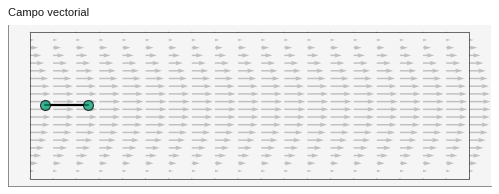

In [49]:
vis = mvis.Plotter(1,1, [dict(aspect = 'equal')])

# Graficación del punto inicial y del punto final.
vis.scatter(1, [xi, xf], [yi, yf], dict(fc='C3', ec='k', alpha=0.75, s=80, zorder=5))

# Graficación de la trayectoria.
vis.plot(1, [xi, xf], [yi, yf], dict(ls = '-', c ='k'))

# Graficación del flujo.
vis.quiver(1, xg, yg, u(xg,yg), v(xg,yg), dict(color='silver'))
vis.plot_frame(1, xg, yg, ticks=False)
vis.axes(1).set_title('Campo vectorial', fontsize=10)
plt.show()

En el cálculo anterior, se realizó el seguimiento durante **un solo paso de tiempo** y definimos el paso de tiempo $\delta t$ igual a $0.05$. 

Para calcular varios pasos de tiempo debemos definir lo siguiente:

1. El número de pasos que deseamos calcular $N_t$.
2. Definir un arreglo para almacenar las coordenadas de la trayectoria en cada paso.
3. Realizar un ciclo de cálculo que permita ir calculando la trayectoria con el método de Euler hacia adelante.

El siguiente algoritmo describe los pasos a realizar:
<center>
<img src="../utils/figs/algTrayectoria01.png"  width='400px'/>
</center>

En el algoritmo anterior estamos usando $h_t$ como paso de tiempo.

<a name='ej-2'></a>
#### **<font color="DodgerBlue">Ejercicio 2. Implementación del Método de Euler para varios pasos de tiempo.</font>**

<font color="DarkBlue">Tomando en cuenta el algoritmo 1, complete el código que sigue agregando las fórmulas correspondientes al Método de Euler hacia adelante para cada coordenada.</font>

In [50]:
# Número de pasos de tiempo.
Nt = 5  
𝛿𝑡 = 0.05

# Posición inicial de la partícula
xi = 0.1  
yi = 0.0

# Definimos el arreglo para almacenar las posiciones
c = np.zeros((Nt, 2))
c[0] = (xi, yi)

for n in range(1, Nt): # Ciclo para calcular las posiciones
    ### BEGIN SOLUTION
    xf = xi + 𝛿𝑡 * u(xi,yi) # Fórmula de Euler para x
    yf = yi + 𝛿𝑡 * v(xi,yi) # Fórmula de Euler para y
    ### END SOLUTION
    
    c[n] = (xf, yf)         # Agregamos (xf, yf) a la lista de posiciones
    (xi, yi) = (xf, yf)     # Actualizamos (xi, yi)

file_answer.write('2', c, 'Tu implementación no es la correcta, revisa la formula de Euler')

print('Posiciones de la trayectoria\n {}'.format(c))

Posiciones de la trayectoria
 [[0.1        0.        ]
 [0.39563492 0.        ]
 [0.69126984 0.        ]
 [0.98690476 0.        ]
 [1.28253968 0.        ]]


In [73]:
quizz.eval_numeric('2', c)

--------------------------------------------------------------------------------
Tu resultado es correcto.
--------------------------------------------------------------------------------


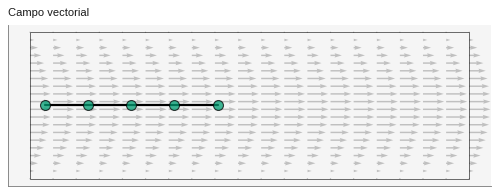

In [51]:
vis = mvis.Plotter(1,1, [dict(aspect = 'equal')])

# Graficación del punto inicial y del punto final.
vis.scatter(1, c[:,0], c[:,1], dict(fc='C3', ec='k', alpha=0.75, s=80, zorder=5))

# Graficación de la trayectoria.
vis.plot(1, c[:,0], c[:,1], dict(ls = '-', c ='k'))

# Graficación del flujo.
vis.quiver(1, xg, yg, u(xg,yg), v(xg,yg), dict(color='silver'))
vis.plot_frame(1, xg, yg, ticks=False)
vis.axes(1).set_title('Campo vectorial', fontsize=10)
plt.show()

<a name='3'></a>
## Cálculo de varias trayectorias.

Para calcular varias trayectorias haremos lo siguiente.

<a name='3-1'></a>
### Definición de las posiciones iniciales.

Primero se deben definir las posiciones iniciales de $N_p$ partículas y graficarlas:

Posiciones iniciales 
 px = [0. 0. 0. 0. 0. 0. 0.] 
 py = [-0.4        -0.26666667 -0.13333333  0.          0.13333333  0.26666667
  0.4       ]


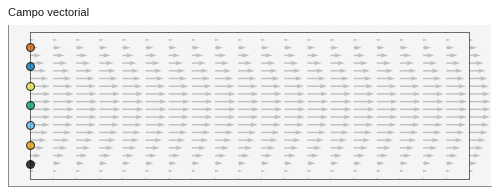

In [52]:
# Número de partículas
Np = 7

# Coordenadas iniciales de las partículas
px = np.zeros(Np)
py = np.linspace(-0.4, 0.4, Np) # Equiespaciadas en dirección y

print('Posiciones iniciales \n px = {} \n py = {}'.format(px, py))

vis = mvis.Plotter(1,1, [dict(aspect = 'equal')])

# Graficación de las posiciones iniciales
for i in range(Np):
    vis.scatter(1, px[i], py[i], dict(ec='k', alpha=0.75, s=50, zorder=5))

# Graficación del flujo.
vis.quiver(1, xg, yg, u(xg,yg), v(xg,yg), dict(color='silver'))
vis.plot_frame(1, xg, yg, ticks=False)
vis.axes(1).set_title('Campo vectorial', fontsize=10)
plt.show()

<a name='3-2'></a>
### Seguimiento de todas las partículas.

Ahora realizamos el seguimiento de cada partícula y dibujamos su trayectoria usando el siguiente algoritmo:
<center>
<img src="../utils/figs/algTrayectoria02.png"  width='400px'/>
</center>

<a name='ej-3'></a>
#### **<font color="DodgerBlue">Ejercicio 3. Implementación del Método de Euler para varias partículas.</font>**

<font color="DarkBlue">Tomando en cuenta el algoritmo 2, complete el código siguiente para calcular las trayectorias de $7$ partículas usando como posiciones iniciales los arreglos `px = [0. 0. 0. 0. 0. 0. 0.]` y `py = [-0.4 -0.26666667 -0.13333333 0. 0.13333333 0.26666667 0.4]` calculados anteriormente. Use también los valores `Nt = 10` y `ht = 0.05`.</font>

In [53]:
Nt = 10
ht = 0.05
t = np.zeros((Np, Nt,2))

for j in range(0, Np):
    t[j, 0, :] = (px[j], py[j]) 

for j in range(0,Np):
    (xi, yi) = t[j, 0, :] # Posición inicial de la trayectoria j
    for n in range(1, Nt): # Ciclo para calcular las posiciones
        ### BEGIN SOLUTION
        xf = xi + 𝛿𝑡 * u(xi,yi) # Fórmula de Euler para x
        yf = yi + 𝛿𝑡 * v(xi,yi) # Fórmula de Euler para y
        t[j, n, :] = (xf, yf)   # Agregamos (xf, yf) a la lista de posiciones
        (xi, yi) = (xf, yf)     # Actualizamos (xi, yi)
        ### END SOLUTION

file_answer.write('3', t, 'Revisa el cálculo de t[] en cada paso de tiempo.')
print(' Número de pasos: {} \n Paso de tiempo: {} \n Número de partículas: {}'.format(Nt, ht, Np))

 Número de pasos: 10 
 Paso de tiempo: 0.05 
 Número de partículas: 7


In [76]:
quizz.eval_numeric('3', t)

--------------------------------------------------------------------------------
Tu resultado es correcto.
--------------------------------------------------------------------------------


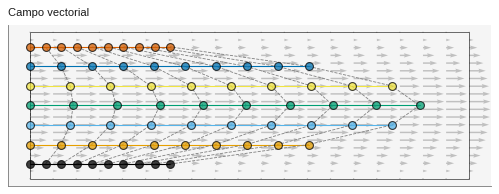

In [54]:
vis = mvis.Plotter(1,1, [dict(aspect = 'equal')])

# Graficación de las posiciones iniciales
for j in range(Np):
    vis.scatter(1, t[j,:,0], t[j,:,1], dict(ec='k', alpha=0.75, s=50, zorder=5))
    vis.plot(1, t[j,:,0], t[j,:,1], dict(ls ='-', lw=1.0))

vis.plot(1, t[:,:,0], t[:,:,1], dict(ls='--', c='gray', lw=0.75))

# Graficación del flujo.
vis.quiver(1, xg, yg, u(xg,yg), v(xg,yg), dict(color='silver'))
vis.plot_frame(1, xg, yg, ticks=False)
vis.axes(1).set_title('Campo vectorial', fontsize=10)
plt.show()

<a name='ej-4'></a>
#### **<font color="DodgerBlue">Ejercicio 4. Interactivo.</font>**

- <font color="DarkBlue">Ejecute la siguiente celda para obtener un simulador en donde puede variar algunos parámetros para graficar un flujo y las trayectorias de varias partículas.</font> 

In [21]:
%run "./zFlujo_interactive.ipynb"

interactive(children=(IntSlider(value=20, description='Nt', max=50, min=10, step=5), FloatSlider(value=0.02, d…

<a name='4'></a>
## Problema de Valor Inicial (PVI)
El problema de calcular la posición $x_f$ a partir de una posición inicial $x_i$, una velocidad $v$ y un paso de tiempo $t$, se puede escribir en términos de un problema de valor inicial bien planteado (PVI). 

Sabemos que la velocidad es el cambio de la posición con respecto al tiempo, es decir: 

$$v(x,t) = \dfrac{d x}{d t}$$

Entonces, en términos de un PVI, el cálculo de la posición $x$ se puede escribir como sigue:

Aproximar $x(t)$ al problema:
$$
\begin{eqnarray}
\dfrac{d x}{d t} & = & v(t, x) \qquad \text{ para }  t \in [0,T_{max}] \\
x(t=0) & = & x_i \qquad \text{(posición inicial)}
\end{eqnarray}
$$

En general, en un PVI se busca la solución de una ecuación diferencial ordinaria, en donde se debe satisfacer una condición inicial y se expresa como sigue:

---
Aproximar $y(t)$ al problema:
$$
\begin{eqnarray}
\dfrac{d y}{d t} & = & f(t, y) \qquad \text{ para } a < t < b \\
y(t=a) & = & \alpha \qquad \text{(condición inicial)}
\end{eqnarray}
$$

donde la función $f(t,y)$ debe satisfacer ciertas condiciones de continuidad para que exista una solución $y(t)$ única.

---

<a name='5'></a>
## Deducción del método de Euler (hacia adelante)

El método de Euler (hacia adelante) permite obtener soluciones aproximadas a un PVI, es decir una aproximación a la función $y(t)$. Para obtener este método definimos lo siguiente:
* $N_t$: número de pasos de tiempo igualmente espaciados en $[a,b]$.
* Tamaño de paso: $h_t = \dfrac{(b−a)}{N_t}$.
* Pasos de tiempo: $t_n = a + n ∗h_t$ para $n = 0,1,...,N_t$.

Supongamos que el PVI tiene una solución única $y(t)$ y que además tiene al menos dos derivadas continuas en $[a,b],$ de tal manera que para cada $n = 0,1,2, \dots , N_t-1$ tenemos la siguiente expansión en series de Taylor:

$$
y(t_{n+1}) = y(t_n) + (t_{n+1} - t_n)  \dfrac{d y}{d t} (t_n) + \dfrac{(t_{n+1} - t_n)^2}{2} \dfrac{d^2 y}{d t^2} (\xi_n)
$$

para algún número $\xi_n \in (t_n - t_{n+1})$.

Dado que $y(t)$ satisface la ecuación diferencial del PVI y como $h_t = (t_{n+1} - t_n) $ entonces podemos escribir:

$$
\begin{equation}
y(t_{n+1}) = y(t_n) + h_t  \, f(t_n, y(t_n)) + \dfrac{h_t^2}{2} y^{\prime \prime} (\xi_n)
\end{equation}
$$

El método de Euler hacia adelante (*forward*) consiste en eliminar el último término de la ecuación anterior de tal manera que, definiendo $y_n \equiv y(t_n)$ tenemos lo siguiente

$$
\begin{eqnarray}
y_0 & = & y(a) = \alpha \qquad \text{(condición inicial)}\nonumber \\
y_{n+1} & = & y_n + h_t \, f(t_n, y_n), \text{ para } n = 0,1,2, \dots, N_t - 1 \tag{2}
\end{eqnarray}
$$

La ecuación ($2$) proporciona una aproximación a la solución del PVI en el paso $t_{n+1}$ y se conoce como la ecuación en diferencias.

Este método:

* Obtiene una solución numérica, con una aproximación de primer orden: $\mathcal{O}(h_t)$
* Es explícito.
* Es barato.
* Es fácil de implementar.
* Es condicionalmente estable.